#   CIL Customer Satisfaction

### Objective: 
The objective of this work is to check CIL customer satisfaction drivers. There was a news on COWI portal that PMs are the key drivers of customer staisfaction, I wanted to check whether that is really true for CIL projects also. For this Artificial Intteligence (Machine Learning) approach would be adopted to understand.

### Dataset:
The challenge was appropriate dataset to make the machine learning alogorithms to impliment, I have used KPI sheet of CIL extensively to obtain features that might impact NPS. (Net Promoter Score). The data description is as below:

| Sl No 	| Field Name 	| Description |
|-|-|-|
|1)	|Year|Year contains 2017 and 2018 values|
|2)|	Client_Name|	Name of client|
|3)|	Project_Name|	Name of project with client|
|4)|	Servicelines|	Name of service line: AT, Vector, Ortho, LiDAR|
|5)	|Service_line_count|	Count of involved service line, range from 1 to 4|
|6)|	PFM|	Name of Portfolio Manager|
|7)|	PM	|Name of Project Manager|
|8)|	Current_Status	|Current status of the project, this field will not be used|
|9)|	CSS_Sent_Date	|CSS email sent date|
|10)|	CSS_feedback_receipt_date	|CSS feedback received date|
|11)|	Cust_resp_days|	Days taken by customer to respond|
|12)	|Customer_type|	Customer type: Based upon NPS score it is classified as 1-6: Detractors, 7-8: Passive, 9-10: Promoter|
|13)	|NPS|	Net promoter score: Response score of client on this question:"How likely are you to recommend COWI to others within your field?" |
|14)	|Quality_score|	Response score of client on this question: "How satisfied are you with the quality of the services we provide?"|
|15)	|Cost_score|	Response score of client on this question: "How satisfied are you with our ability to deliver at the agreed price?"|
|16)	|Time_score|	Response score of client on this question:"How satisfied are you with our ability to deliver on the agreed time?"|
|17)	|PM_score|	Response score of client on this question:"How satisfied are you with the project manager’s ability to identify with your situation and needs?"|
|18)	|Total_deliveries|	Total deliveries made to customer for year 2017 and 2018 respectively|
|19)	|Delayed_deliveries|	Count of delivery timeline failures|
|20)	|Quality_feedback_on_delivery|	Count of quality feedback on deliveries|

### Open Questions:

1) From how many clients we have received feedback?

2) How many Detractors, Passive, Promoter?

3) Is there any relation between PM name and NPS result?

4) What are the factors that influence NPS?

5) How is the contribution of each factor in result NPS?


#### Import basic packages

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 8  # set plot size

#### Load the dataset

In [32]:
local_path='C:/SKCY/Organisation/'
df_css=pd.read_excel(local_path+'CSS_combined.xlsx',sheetname='CSS')
df_css.head()

,year,client_name,project_name,servicelines,service_line_count,pfm,pm,current_status,css_sent_date,css_feedback_receipt_date,cust_resp_days,customer_type,nps,quality_score,cost_score,time_score,pm_score,total_deliveries,delayed_deliveries,quality_feedback
0,2017,BSF-SPNO,5 projects,AT/Vector/Ortho,3,MADV,MNJA,In Progress,2017-12-13,2017-12-13,0,Promoter,9.0,8,9.5,8.0,10,7,0,1
1,2017,Digital Globe,Nigeria Oil Theft Analysis - July,2D,1,MADV,MNJA,Closed,2017-09-13,2017-09-13,0,Promoter,9.0,8,10.0,9.0,9,9,0,2
2,2017,FIRST BASE SOLUTION,1737 DURH & 1737 HALT,Vector,1,NSPI,MVRA,Closed,2017-10-10,2017-12-14,65,Passive,8.0,7,8.0,8.0,8,5,0,2
3,2017,VANSTEELANDT,GRB,Vector,1,MADV,MVRA,In Progress,2017-10-12,2017-10-12,0,Detractors,7.0,7,10.0,9.0,8,39,0,4
4,2017,BSF-SWISSPHOTO,M7016 DOP Luzern 2017,Ortho,1,MADV,MVRA,Closed,2017-12-07,2017-12-14,7,Promoter,9.0,9,8.0,10.0,10,35,0,32


#### How many client feedback had we received?

In [33]:
print('Number of client feedback received:',len(df_css))

Number of client feedback received: 23


#### Basic data cleaning

In [34]:
col_str=df_css.columns[df_css.dtypes=='object']
col_str
#Make all string values in data to upper case
for i in col_str:
    df_css[i]=df_css[i].apply(lambda x: str.upper(x))

#### Who are the clients those reponsed both in 2017 and 2018?

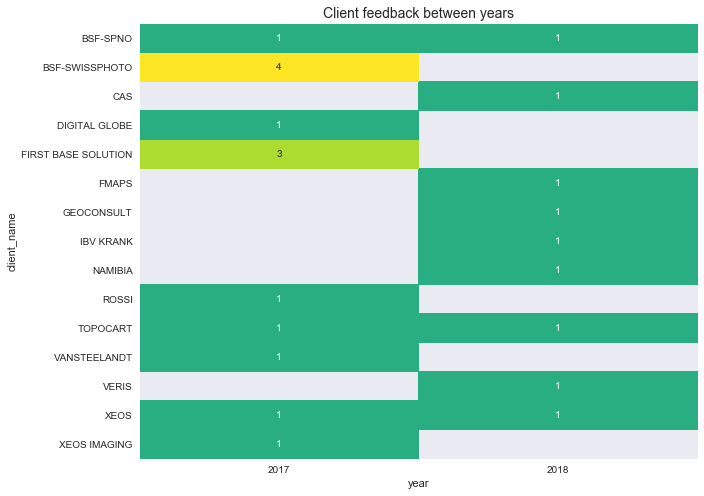

In [35]:
sns.heatmap(df_css.pivot_table(values='pfm',index='client_name',columns='year',aggfunc=np.size),
            cmap='viridis',vmin=-2,annot=True,cbar=False)
plt.title('Client feedback between years',fontsize=14)

#### What is our client behaviour type? How many promoters do we have?

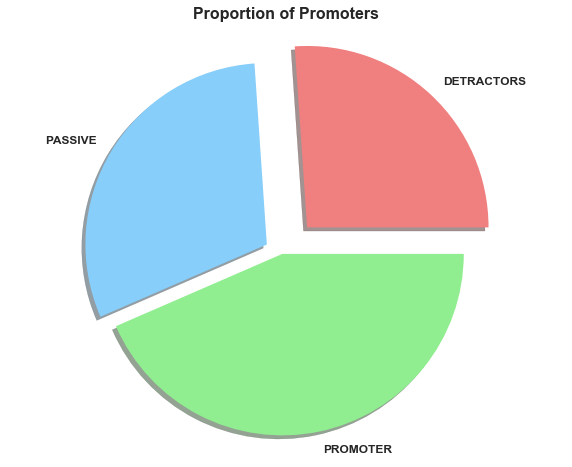

% of promoters: customer_type
DETRACTORS    26.086957
PASSIVE       30.434783
PROMOTER      43.478261
Name: year, dtype: float64


In [36]:
plt.pie(df_css.groupby('customer_type').count()['year'],explode=[.2,.1,0],colors=['lightcoral','lightskyblue','lightgreen'],
        shadow=True,labels=df_css.groupby('customer_type').count()['year'].index,
       textprops={"fontweight":"bold", "fontsize":"large"})
plt.axis('equal')
plt.title('Proportion of Promoters',fontsize=16,fontweight='bold')
plt.show()
print('% of promoters:',df_css.groupby('customer_type').count()['year']/len(df_css)*100)

#### Feature extraction:

These fields does not provide much value for machine learning. Let us drop field like: project_name,pfm, current_status, css_sent_date, css_feedback_receipt_date

In [37]:
df_css_cl=df_css.drop(['project_name','pfm', 'current_status', 'css_sent_date', 'css_feedback_receipt_date'],1)
df_css_cl.head()

,year,client_name,servicelines,service_line_count,pm,cust_resp_days,customer_type,nps,quality_score,cost_score,time_score,pm_score,total_deliveries,delayed_deliveries,quality_feedback
0,2017,BSF-SPNO,AT/VECTOR/ORTHO,3,MNJA,0,PROMOTER,9.0,8,9.5,8.0,10,7,0,1
1,2017,DIGITAL GLOBE,2D,1,MNJA,0,PROMOTER,9.0,8,10.0,9.0,9,9,0,2
2,2017,FIRST BASE SOLUTION,VECTOR,1,MVRA,65,PASSIVE,8.0,7,8.0,8.0,8,5,0,2
3,2017,VANSTEELANDT,VECTOR,1,MVRA,0,DETRACTORS,7.0,7,10.0,9.0,8,39,0,4
4,2017,BSF-SWISSPHOTO,ORTHO,1,MVRA,7,PROMOTER,9.0,9,8.0,10.0,10,35,0,32


#### Dumify the text variables to make machine level language

In [38]:
from sklearn.preprocessing import LabelEncoder   #Imports dumifier package
le=LabelEncoder()

str_col=df_css_cl.columns[df_css_cl.dtypes=='object']
for i in str_col:
    df_css_cl[i]=le.fit_transform(df_css_cl[i])
df_css_cl[str_col].head()

,client_name,servicelines,pm,customer_type
0,0,4,1,2
1,3,0,1,2
2,4,7,2,1
3,11,7,2,0
4,1,6,2,2


In [39]:
df_css_cl.head()

,year,client_name,servicelines,service_line_count,pm,cust_resp_days,customer_type,nps,quality_score,cost_score,time_score,pm_score,total_deliveries,delayed_deliveries,quality_feedback
0,2017,0,4,3,1,0,2,9.0,8,9.5,8.0,10,7,0,1
1,2017,3,0,1,1,0,2,9.0,8,10.0,9.0,9,9,0,2
2,2017,4,7,1,2,65,1,8.0,7,8.0,8.0,8,5,0,2
3,2017,11,7,1,2,0,0,7.0,7,10.0,9.0,8,39,0,4
4,2017,1,6,1,2,7,2,9.0,9,8.0,10.0,10,35,0,32


#### Try to understand distribution

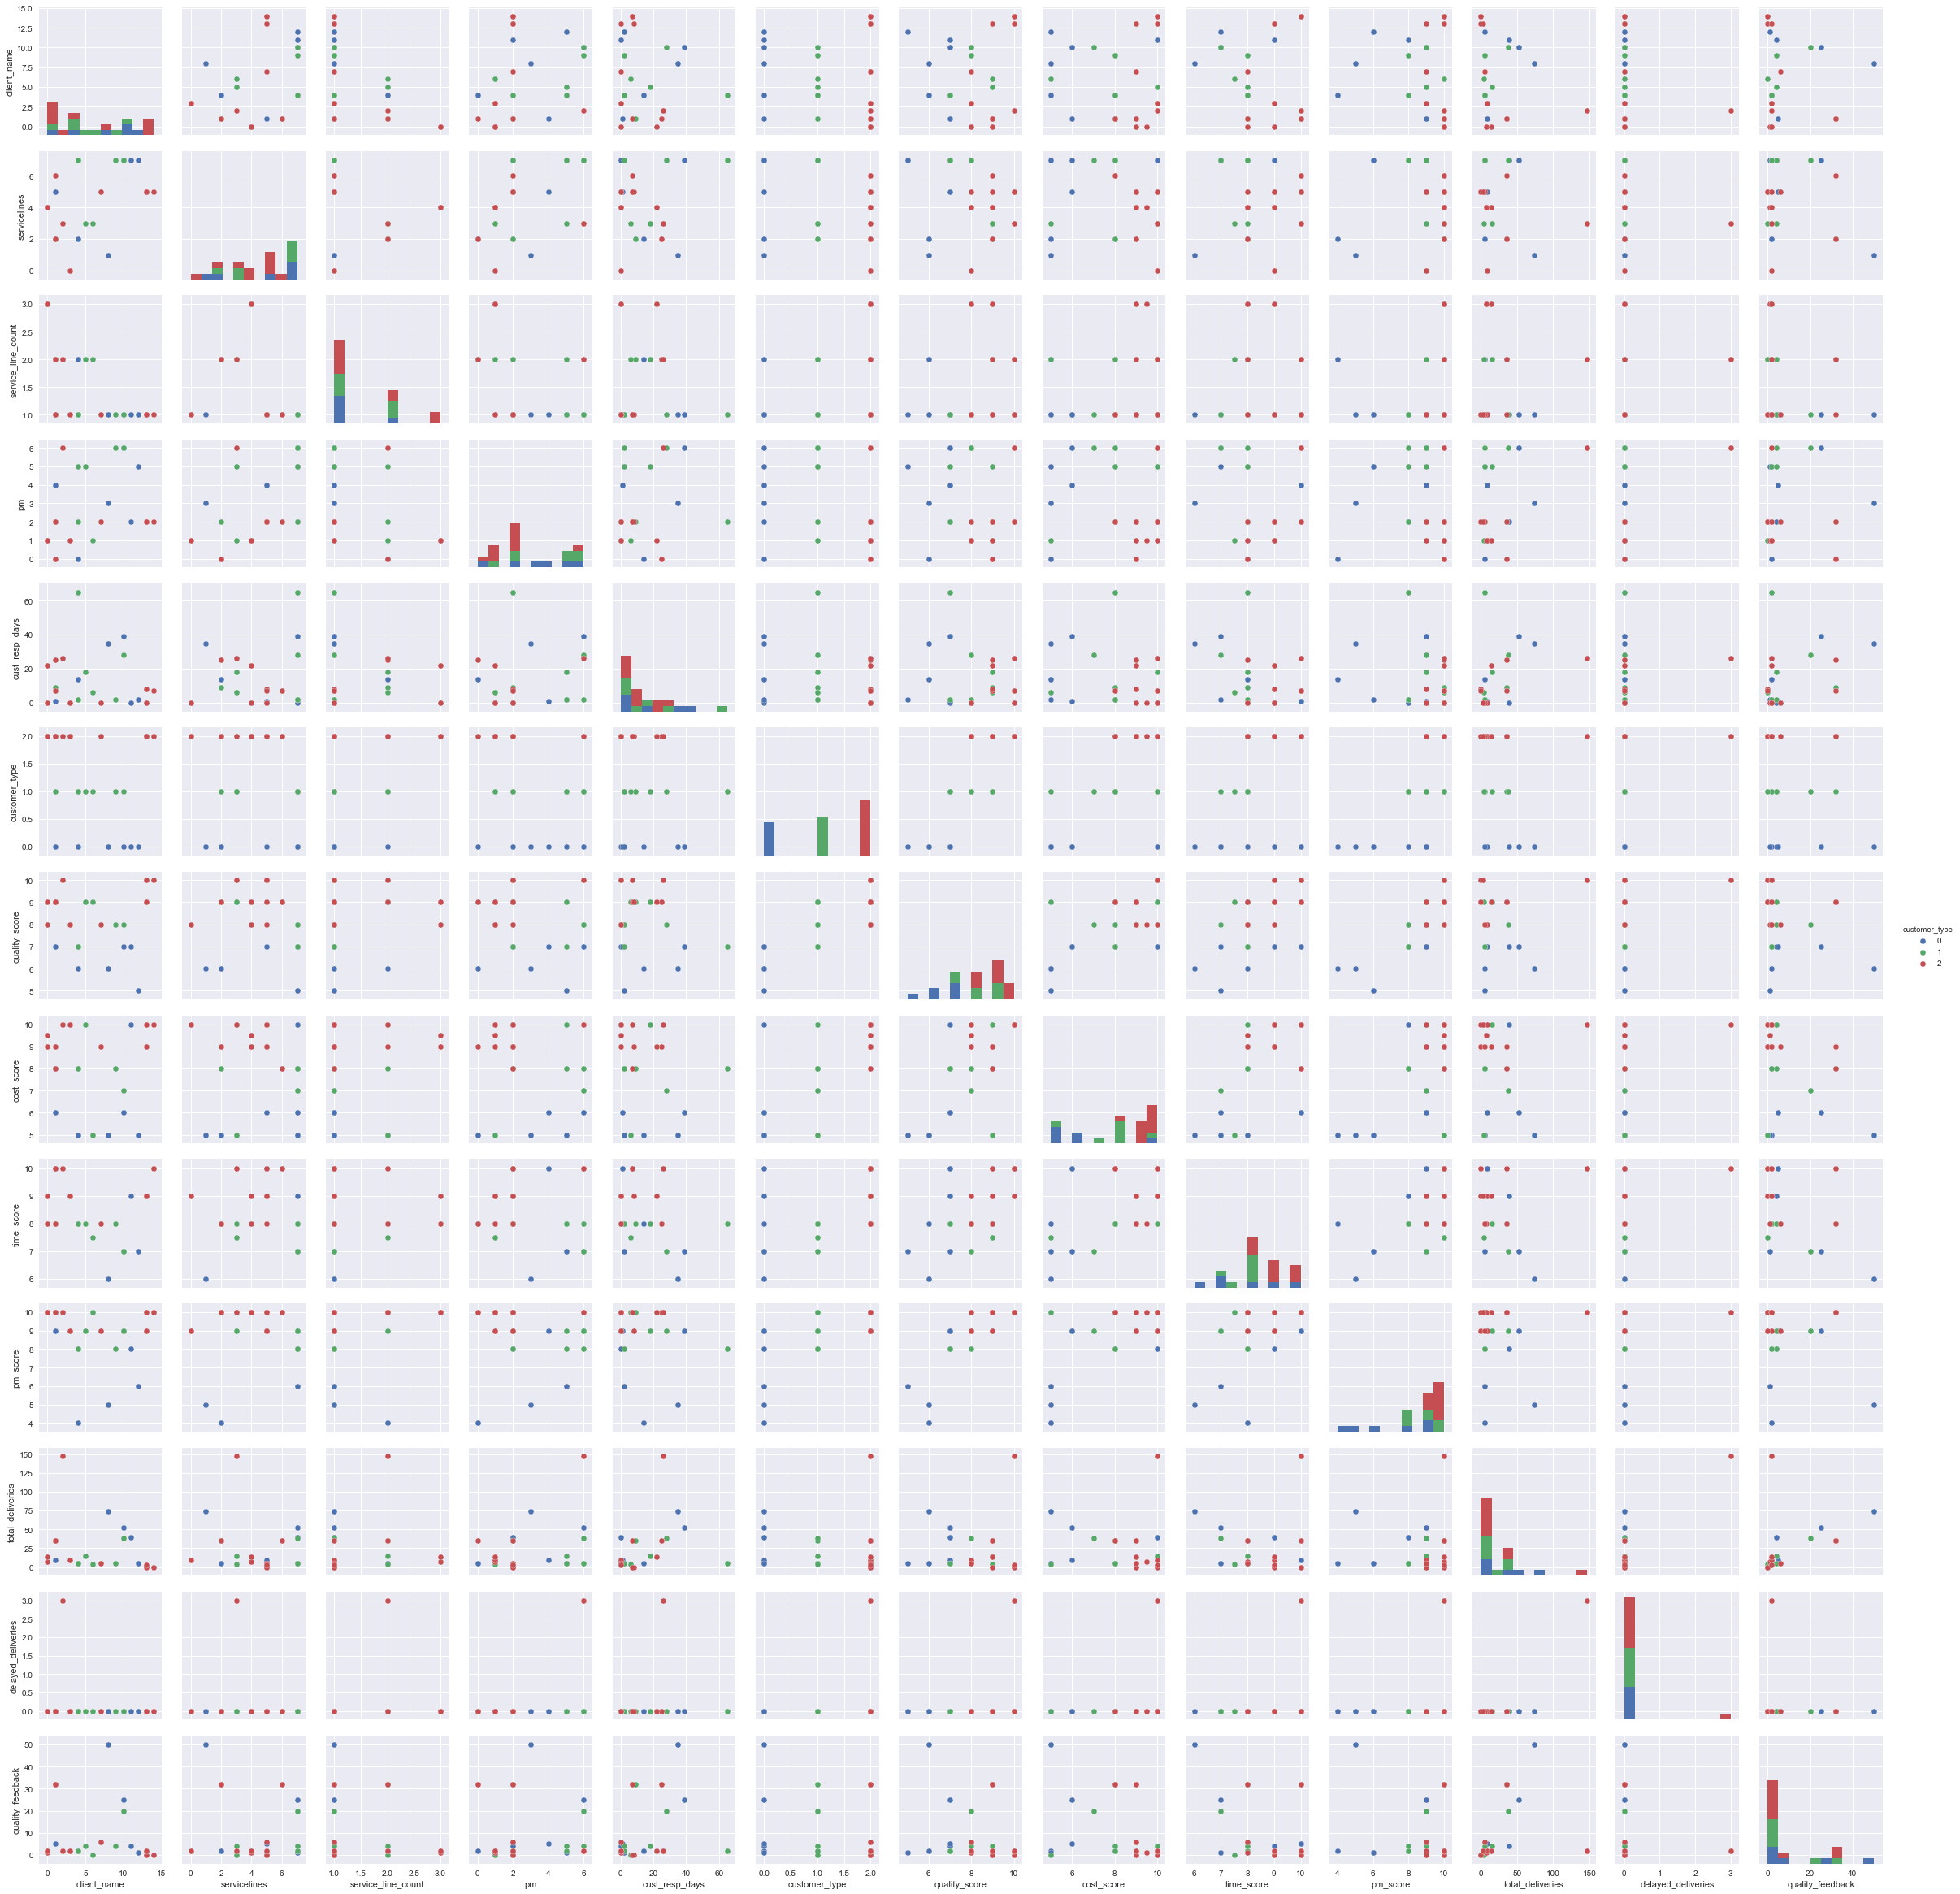

In [40]:
plt.figure(figsize=(18,16))
sns.pairplot(df_css_cl.drop(['year','nps'],1),hue='customer_type')

### Apply Machine Learning


In [41]:
#Import machine learning packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


#### Feature and Output (X,Y)

In [42]:
X=df_css_cl.drop(['customer_type','nps','year'],1)
y=df_css_cl['customer_type']
print('X:',X.columns.tolist())
print('y:','customer_type')

X: ['client_name', 'servicelines', 'service_line_count', 'pm', 'cust_resp_days', 'quality_score', 'cost_score', 'time_score', 'pm_score', 'total_deliveries', 'delayed_deliveries', 'quality_feedback']
y: customer_type


In [43]:
#X=df_css_cl.drop(['customer_type','nps','year','total_deliveries','pm','total_deliveries','delayed_deliveries','quality_feedback'],1)
#y=df_css_cl['customer_type']

#### Apply Decision Tree

In [44]:
#Select Best Parameters for Decision Tree
dtone=tree.DecisionTreeClassifier()
dt_params={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5],'max_leaf_nodes':[2,3,4,5]}
dtgrd=GridSearchCV(dtone,dt_params,cv=5)
dtgrd.fit(X,y)
print('Best parameters for DT:',dtgrd.best_params_)
print('Best accuracy CV score for DT:',dtgrd.best_score_)

Best parameters for DT: {'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 5}
Best accuracy CV score for DT: 0.6956521739130435


#### Logic of Decision Tree

In [51]:
dtbest=tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=5)
dtbest.fit(X,y)
with open('CIL_CSS.dot','w')as f:
    f=tree.export_graphviz(dtbest,out_file=f,feature_names=X.columns.tolist())

#### visit http://webgraphviz.com/  to visualize the tree

#### Apply Random Forest

In [46]:
#Select best rf parameters for RF
rfone=RandomForestClassifier()
rf_params={'n_estimators':[2,6,8,10,20],'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5],
           'max_leaf_nodes':[2,3,4,5],'random_state':[1,2]}
rfgrd=GridSearchCV(rfone,rf_params,cv=5)
rfgrd.fit(X,y)
print('Best parametrs for RF:',rfgrd.best_params_)
print('Best CV score for RF:',rfgrd.best_score_)

Best parametrs for RF: {'criterion': 'entropy', 'max_depth': 1, 'max_leaf_nodes': 3, 'n_estimators': 8, 'random_state': 2}
Best CV score for RF: 0.782608695652174


In [47]:
rf_two=RandomForestClassifier(criterion='gini',max_depth=2,max_leaf_nodes=3,n_estimators=8,random_state=2)
rf_model=rf_two.fit(X,y)
#print('Importance of features',list(zip(X.columns.tolist(),rf_model.feature_importances_)))

In [48]:
print('RF Model score after applying best parameters:',rf_two.score(X,y))

RF Model score after applying best parameters: 0.9565217391304348


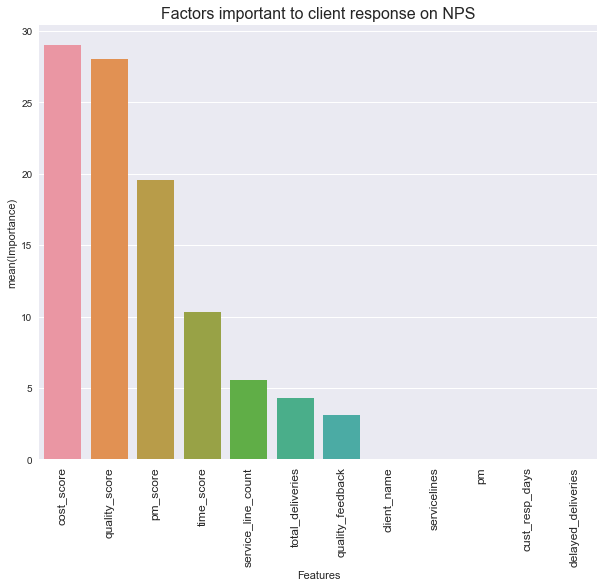

In [49]:
df_feat_imp=pd.DataFrame({'Features':X.columns.tolist(),'Importance':100*rf_model.feature_importances_})
df_feat_imp=df_feat_imp.sort_values('Importance',ascending=False)
#df_feat_imp.sort_values('Importance').plot(kind='barh')
#plt.figure(figsize=(1,10))
sns.barplot(x='Features',y='Importance',data=df_feat_imp)
a=np.arange(len(X.columns))
plt.xticks(a,(df_feat_imp.Features),rotation=90,fontsize=12)
plt.title('Factors important to client response on NPS',fontsize=16)
plt.show()

#### Apply Support Vector Machine

In [50]:
from sklearn.svm import SVC
svc=SVC()
svc_params={'C':[1,2,10],'kernel':['rbf','linear'],'gamma':[1,2,3]}
svcgrd=GridSearchCV(svc,svc_params,cv=5)
svcgrd.fit(X,y)
print('Best SVC parametrs:',svcgrd.best_params_)
print('Best CV score:',svcgrd.best_score_)

Best SVC parametrs: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best CV score: 0.5652173913043478


### Conclusion:

To conclude it has been observed that results from Random Forest algorithm was best on cross validation score as .78, however when applied on dataset without cross validation the score of the model was significantly high as ~0.96. That means that there has been overfitting of the algorithm on training dataset. As the dataset is very small (23 rows) this was expected as in cross validation appropriate representation of population may not have happenned.

Further it was understood that cost score and quality score from client are most impacting factor followed by PM ability score by client for client to behave like Promoter/Passive/Detrators.

